In [1]:
!pip install pandas
!pip install openpyxl
!pip install pip install scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade 

#O código abaixo carrega os dados a partir de um arquivo CSV de acodo com as configurações informadas em um arquivo JSON

{
    "input_columns": {
      "Car Name": "categorical",
      "Year": "numerical",
      "Mileage": "numerical",
      "Region": "categorical",
      "FuelType": "categorical"
    },
    "output_column": "Price"
}

A primeira linha do arquivo CSV deverá conter o nome dos dados

In [1]:
# Importando bibliotecas necessárias
import importlib

# Importando o módulo personalizado
import data_processor

# Suponha que você tenha feito alterações no data_processor.py
# Recarregue o módulo
importlib.reload(data_processor)

# Agora você pode usar a função atualizada
X_train, X_test, y_train, y_test = data_processor.process_data('data.csv', 'config.json')


Regressão

Faz o treinamento e teste da LLM para então executar a redução na proxima etapa

Mean Squared Error: 7.086108865197352e-30
R^2 Score: 1.0


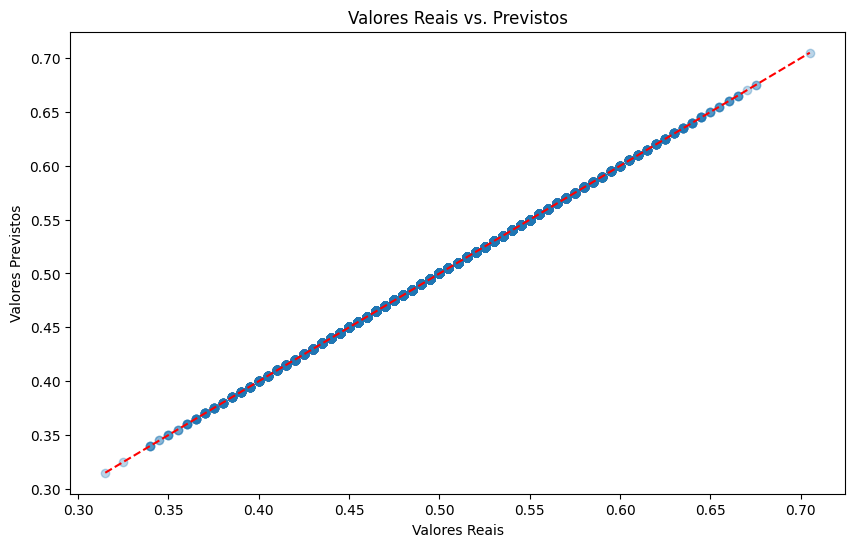

['data/linear_regression_model.pkl']

In [2]:
# Importar bibliotecas e funções necessárias
import os
import pandas as pd
from load_data import load_train_features, load_train_labels, load_test_features, load_test_labels
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Carregar dados de treino e teste
try:
    X_train = load_train_features()
    y_train = load_train_labels()
    X_test = load_test_features()
    y_test = load_test_labels()
except FileNotFoundError as e:
    print(e)
    raise

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotar os valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Linha para valores perfeitos
plt.show()

# Salvar o modelo treinado
joblib.dump(model, 'data/linear_regression_model.pkl')


In [ ]:
Regressão

O arquivo com os dados que serão utilizados para inferência deverão estar no arquivo regresion.csvß


In [7]:
# 1. Importar bibliotecas e funções necessárias
import json
import pandas as pd
import joblib
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

# Função para carregar JSON
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 2. Carregar e Processar o JSON
json_path = 'config.json'
config = load_json(json_path)
input_columns = list(config['input_columns'].keys())

# 3. Carregar os Dados para Previsão
regression_data_path = 'regression.csv'
regression_data = pd.read_csv(regression_data_path)

# Validar se todas as colunas necessárias estão presentes nos dados
missing_columns = set(input_columns) - set(regression_data.columns)
if missing_columns:
    raise ValueError(f"Colunas faltantes no arquivo de dados: {missing_columns}")

# Selecionar as colunas especificadas no JSON
data_to_predict = regression_data[input_columns]

# Verificar se as colunas foram selecionadas corretamente
print("Colunas Selecionadas para Previsão:")
print(data_to_predict.head())

# Aplicar as mesmas transformações que foram aplicadas nos dados de treinamento (e.g., one-hot encoding)
data_to_predict_encoded = pd.get_dummies(data_to_predict)

# Certificar-se de que as colunas estão na mesma ordem e formato que nos dados de treinamento
train_features_path = 'data/train_features.csv'
train_features = pd.read_csv(train_features_path)

# Adicionar colunas faltantes no conjunto de previsão
for col in train_features.columns:
    if col not in data_to_predict_encoded.columns:
        data_to_predict_encoded[col] = 0

# Garantir que as colunas estão na mesma ordem
data_to_predict_encoded = data_to_predict_encoded[train_features.columns]

# Verificar se os dados estão corretos após a codificação e reordenação
print("Dados para Previsão Após Codificação e Reordenação:")
print(data_to_predict_encoded.head())

# 4. Carregar o Modelo Treinado e o Scaler
model_path = 'data/linear_regression_model.pkl'
model = joblib.load(model_path)

scaler_path = 'data/scaler.pkl'
scaler = joblib.load(scaler_path)

# 5. Aplicar a Normalização
data_to_predict_normalized = scaler.transform(data_to_predict_encoded)

# Verificar os dados normalizados
print("Dados para Previsão Após Normalização:")
print(data_to_predict_normalized[:5])

# 6. Fazer as Previsões
predictions = model.predict(data_to_predict_normalized)

# Criar um DataFrame com os índices e as previsões
results = pd.DataFrame({'Index': regression_data.index, 'Predicted_FloodProbability': predictions})

# Exibir as previsões
print(results)


Colunas Selecionadas para Previsão:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  Ineffect

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AgriculturalPractices
- ClimateChange
- CoastalVulnerability
- DamsQuality
- Deforestation
- ...
